# Explore and Map Sentinel-2 Imagery Collected from Google Earth Engine

### Explore
In Collect-Imagery, we conducted exploratory data analysis to write, apply, and evaluate functions to generate cloud free mosaics of two regions in Malawi. Then, we built on that code in Batch-Export-Cloud-Free-Mosaic to export over 100 gbs of Cloud Optimized Geotiff files by quarter from June 2020 through September 2023. 

In this notebook, we will explore a dataset in Northern Malawi, and also build a mosaic of tiles to map a full raster of our region in southern Malawi. We will create histograms to understand the underlying data, and generate a new band for NDVI to measure vegetation in the region. 


# Map Northern Cloud Free Image

In [1]:
import geowombat as gw

with gw.open('Cloud_free_malawi_north_img_2022-09-01_2022-12-01.tif') as src:
    print(src)

/Users/rhys/mambaforge/envs/gw-test/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


<xarray.DataArray (band: 4, y: 11157, x: 8919)>
dask.array<open_rasterio-7906f13570c675e2fe6619a4b4d5963c<this-array>, shape=(4, 11157, 8919), dtype=float64, chunksize=(4, 256, 256), chunktype=numpy.ndarray>
Coordinates:
  * band     (band) int64 1 2 3 4
  * x        (x) float64 33.47 33.47 33.47 33.47 ... 34.27 34.27 34.27 34.27
  * y        (y) float64 -9.579 -9.579 -9.579 -9.58 ... -10.58 -10.58 -10.58
Attributes: (12/14)
    transform:           (8.983152841195215e-05, 0.0, 33.47266479074796, 0.0,...
    crs:                 4326
    res:                 (8.983152841195215e-05, 8.983152841195215e-05)
    is_tiled:            1
    nodatavals:          (nan, nan, nan, nan)
    _FillValue:          nan
    ...                  ...
    descriptions:        ('B2', 'B3', 'B4', 'B8')
    filename:            Cloud_free_malawi_north_img_2022-09-01_2022-12-01.tif
    resampling:          nearest
    AREA_OR_POINT:       Area
    _data_are_separate:  0
    _data_are_stacked:   0


<xarray.DataArray (band: 4, y: 11157, x: 8919)>
dask.array<open_rasterio-7906f13570c675e2fe6619a4b4d5963c<this-array>, shape=(4, 11157, 8919), dtype=float64, chunksize=(4, 256, 256), chunktype=numpy.ndarray>
Coordinates:
  * band     (band) int64 1 2 3 4
  * x        (x) float64 33.47 33.47 33.47 33.47 ... 34.27 34.27 34.27 34.27
  * y        (y) float64 -9.579 -9.579 -9.579 -9.58 ... -10.58 -10.58 -10.58
Attributes: (12/14)
    transform:           (8.983152841195215e-05, 0.0, 33.47266479074796, 0.0,...
    crs:                 4326
    res:                 (8.983152841195215e-05, 8.983152841195215e-05)
    is_tiled:            1
    nodatavals:          (nan, nan, nan, nan)
    _FillValue:          nan
    ...                  ...
    descriptions:        ('B2', 'B3', 'B4', 'B8')
    filename:            Cloud_free_malawi_north_img_2022-09-01_2022-12-01.tif
    resampling:          nearest
    AREA_OR_POINT:       Area
    _data_are_separate:  0
    _data_are_stacked:   0


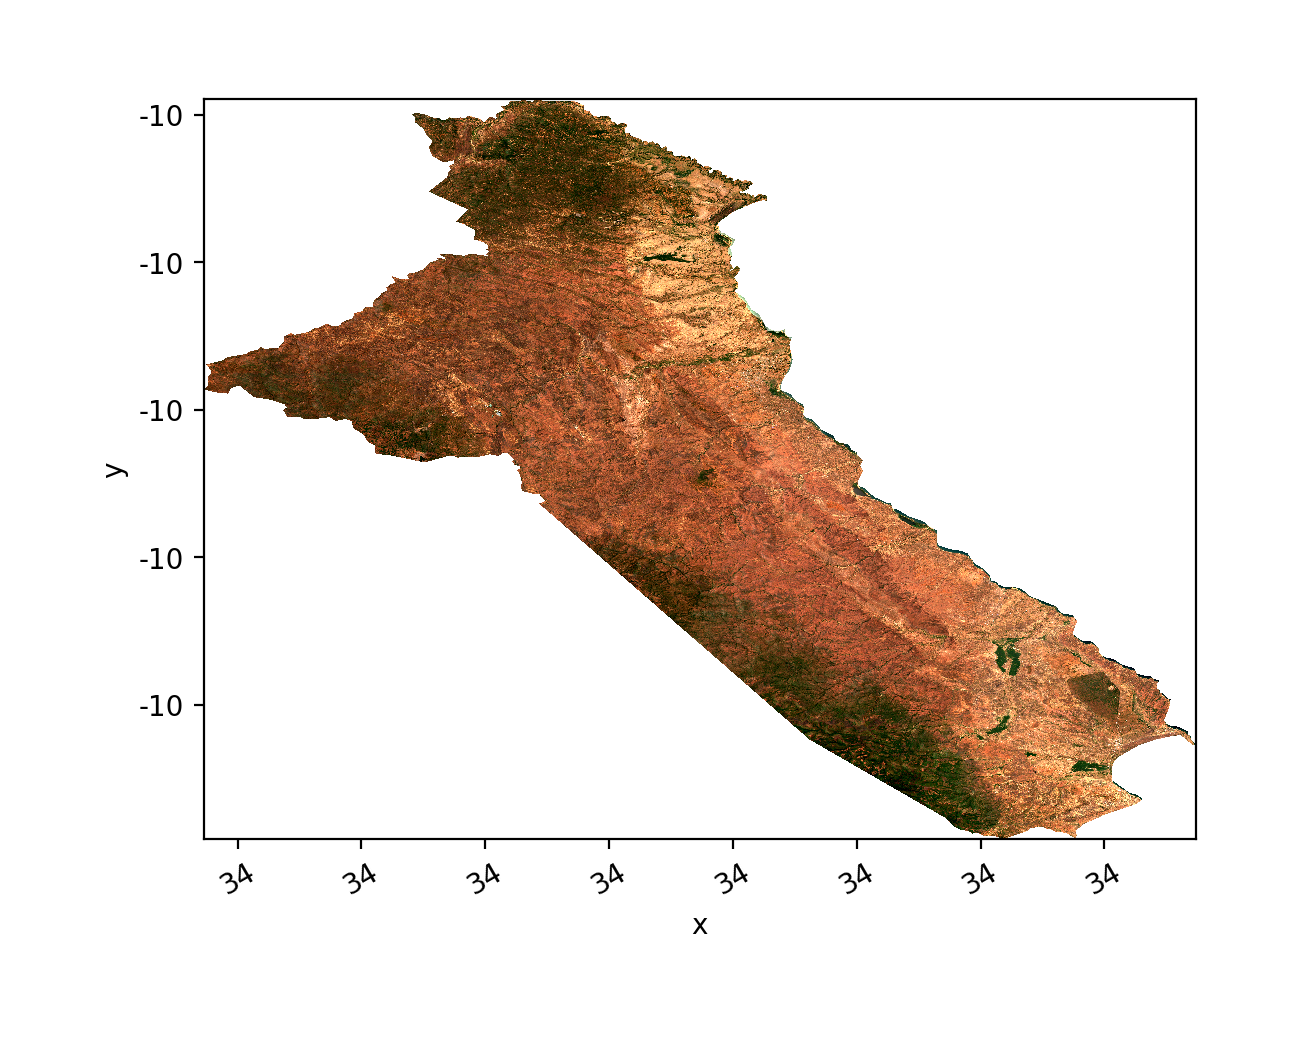

In [2]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(dpi=200)

with gw.open('Cloud_free_malawi_north_img_2022-09-01_2022-12-01.tif') as src:
    src.where(src != 0).sel(band=[3, 2, 1]).gw.imshow(robust=True, ax=ax)
    print(src)


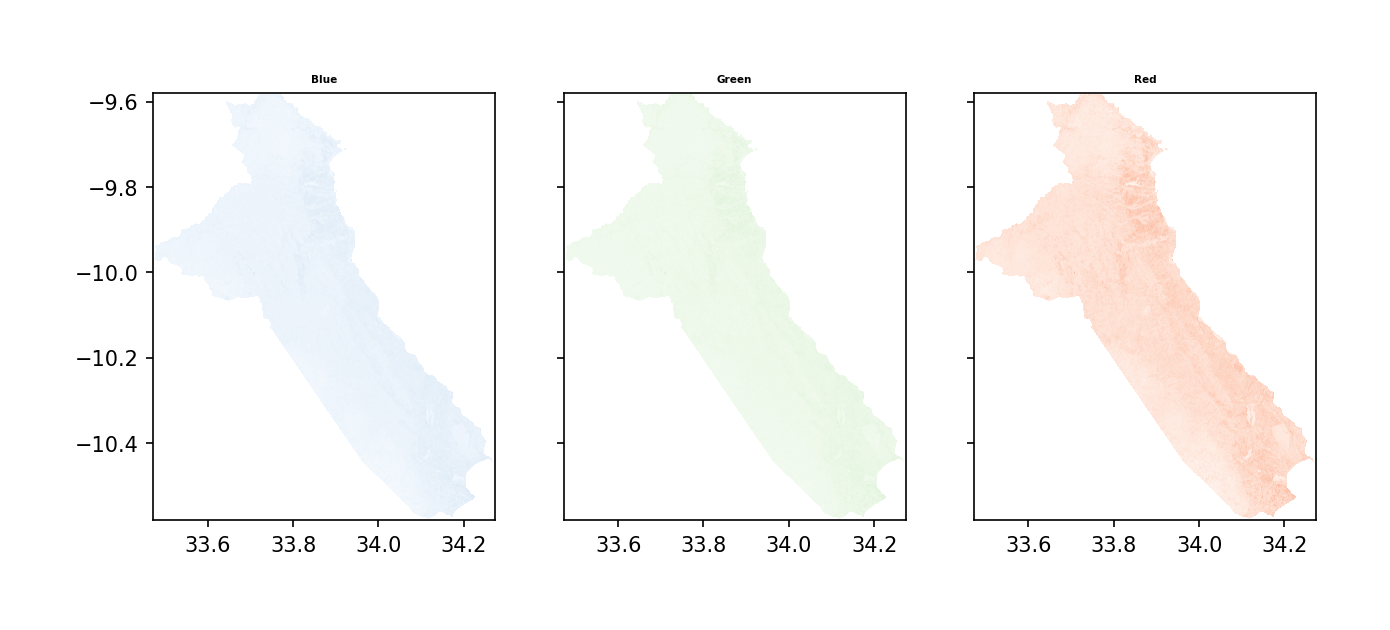

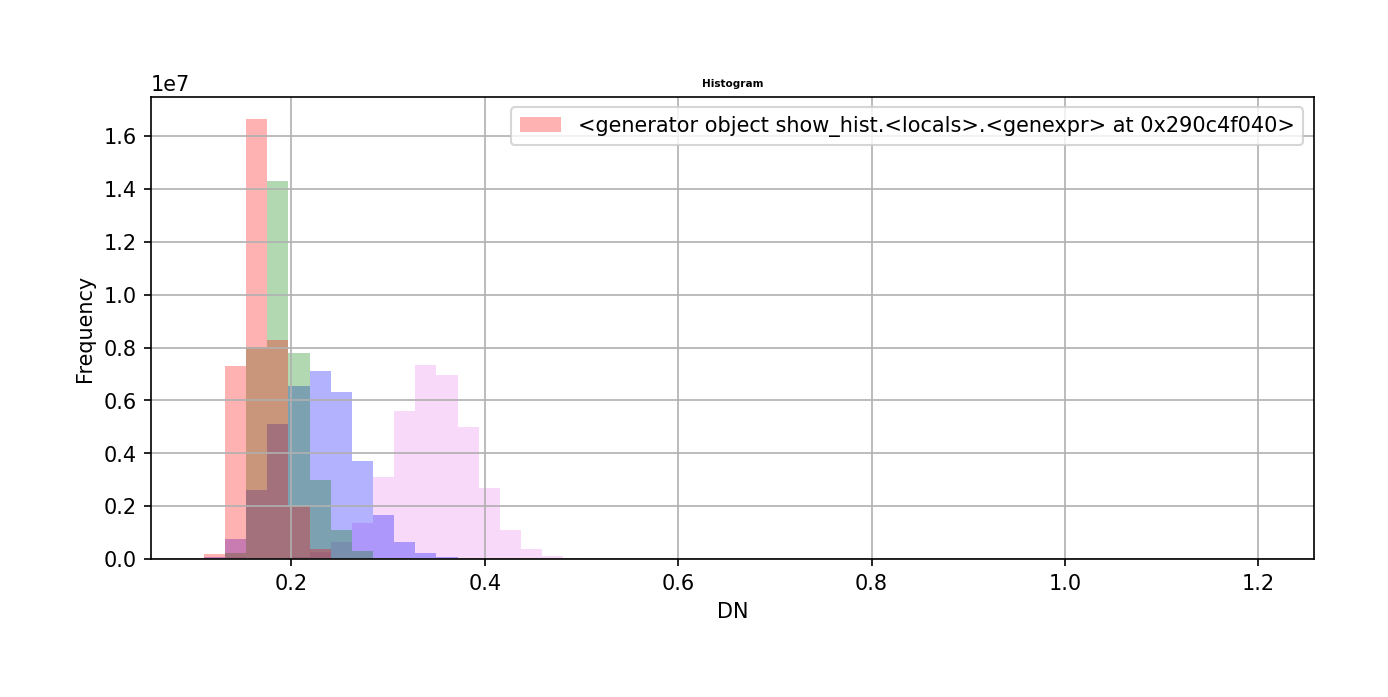

<Figure size 960x720 with 0 Axes>

In [27]:
import rasterio
from rasterio.plot import show_hist
from rasterio.plot import show
import matplotlib.pyplot as plt


def RGB_Diagnostic(fp):
    with rasterio.open(fp) as src:
        data = src.read()
        fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, nrows=1, figsize=(10, 4), sharey=True)
        show((src, 1), ax=ax1, cmap='Blues', title='Blue')
        show((src, 2), ax=ax2, cmap='Greens', title='Green')
        show((src, 3), ax=ax3, cmap='Reds', title='Red')

        fig, ax4 = plt.subplots(ncols=1, nrows=1, figsize=(10, 4) )
        show_hist(src, bins=50, lw=0.0, stacked=False, alpha=0.3, histtype='stepfilled')
        plt.tight_layout()

# Example usage:
img = 'Cloud_free_malawi_north_img_2022-09-01_2022-12-01.tif'
RGB_Diagnostic(img)

# Mosaic Southern Tiles into a Single Image

In [15]:
import os
path = 'Cloud_free_malawi_south_img_2022-09-01_2022-12-01'
files = os.listdir(path)
tiles = [os.path.join(path, file) for file in files]
tiles

['Cloud_free_malawi_south_img_2022-09-01_2022-12-01/Cloud_free_malawi_south_img_2022-09-01_2022-12-01-0000000000-0000011776.tif',
 'Cloud_free_malawi_south_img_2022-09-01_2022-12-01/Cloud_free_malawi_south_img_2022-09-01_2022-12-01-0000035328-0000011776.tif',
 'Cloud_free_malawi_south_img_2022-09-01_2022-12-01/Cloud_free_malawi_south_img_2022-09-01_2022-12-01-0000011776-0000011776.tif',
 'Cloud_free_malawi_south_img_2022-09-01_2022-12-01/Cloud_free_malawi_south_img_2022-09-01_2022-12-01-0000023552-0000011776.tif',
 'Cloud_free_malawi_south_img_2022-09-01_2022-12-01/Cloud_free_malawi_south_img_2022-09-01_2022-12-01-0000000000-0000000000.tif',
 'Cloud_free_malawi_south_img_2022-09-01_2022-12-01/Cloud_free_malawi_south_img_2022-09-01_2022-12-01-0000023552-0000000000-003.tif',
 'Cloud_free_malawi_south_img_2022-09-01_2022-12-01/Cloud_free_malawi_south_img_2022-09-01_2022-12-01-0000035328-0000000000.tif',
 'Cloud_free_malawi_south_img_2022-09-01_2022-12-01/Cloud_free_malawi_south_img_2022-0

In [17]:
with gw.open(tiles, mosaic=True,
    band_names=['blue','green','red', 'nir']) as src:
    print(src)

<xarray.DataArray (band: 4, y: 11775, x: 6814)>
dask.array<maximum, shape=(4, 11775, 6814), dtype=float64, chunksize=(4, 256, 256), chunktype=numpy.ndarray>
Coordinates:
  * x        (x) float64 35.31 35.31 35.31 35.31 ... 35.92 35.92 35.92 35.92
  * y        (y) float64 -13.48 -13.48 -13.48 -13.48 ... -14.54 -14.54 -14.54
  * band     (band) <U5 'blue' 'green' 'red' 'nir'
Attributes: (12/14)
    transform:           (8.983152841195215e-05, 0.0, 35.30630594869273, 0.0,...
    crs:                 4326
    res:                 (8.983152841195215e-05, 8.983152841195215e-05)
    is_tiled:            1
    nodatavals:          (nan, nan, nan, nan)
    _FillValue:          nan
    ...                  ...
    descriptions:        ('B2', 'B3', 'B4', 'B8')
    resampling:          nearest
    geometries:          [<POLYGON ((35.918 -14.539, 35.918 -13.481, 35.306 -...
    AREA_OR_POINT:       Area
    _data_are_separate:  1
    _data_are_stacked:   0


### Let's directly compare some of these tiles and confirm that they have the same CRS for creating a Mosaic.

In [22]:
with gw.open(tiles[1]) as tile_1:
    print('Tile 1: \n', tile_1)

with gw.open(tiles[2]) as tile_2:
    print('Tile 2: \n', tile_2)

Tile 1: 
 <xarray.DataArray (band: 4, y: 5252, x: 6814)>
dask.array<open_rasterio-c80aad1edff53d768f36c0e6d551eedb<this-array>, shape=(4, 5252, 6814), dtype=float64, chunksize=(4, 256, 256), chunktype=numpy.ndarray>
Coordinates:
  * band     (band) int64 1 2 3 4
  * x        (x) float64 35.31 35.31 35.31 35.31 ... 35.92 35.92 35.92 35.92
  * y        (y) float64 -16.65 -16.65 -16.65 -16.65 ... -17.13 -17.13 -17.13
Attributes: (12/14)
    transform:           (8.983152841195215e-05, 0.0, 35.30630594869273, 0.0,...
    crs:                 4326
    res:                 (8.983152841195215e-05, 8.983152841195215e-05)
    is_tiled:            1
    nodatavals:          (nan, nan, nan, nan)
    _FillValue:          nan
    ...                  ...
    descriptions:        ('B2', 'B3', 'B4', 'B8')
    filename:            Cloud_free_malawi_south_img_2022-09-01_2022-12-01/Cl...
    resampling:          nearest
    AREA_OR_POINT:       Area
    _data_are_separate:  0
    _data_are_stacked:   0


In [23]:
display(tile_1)
print(tile_1.transform)
print(tile_1.res)
print(tile_1.crs)

<xarray.DataArray (band: 4, y: 5252, x: 6814)>
dask.array<open_rasterio-c80aad1edff53d768f36c0e6d551eedb<this-array>, shape=(4, 5252, 6814), dtype=float64, chunksize=(4, 256, 256), chunktype=numpy.ndarray>
Coordinates:
  * band     (band) int64 1 2 3 4
  * x        (x) float64 35.31 35.31 35.31 35.31 ... 35.92 35.92 35.92 35.92
  * y        (y) float64 -16.65 -16.65 -16.65 -16.65 ... -17.13 -17.13 -17.13
Attributes: (12/14)
    transform:           (8.983152841195215e-05, 0.0, 35.30630594869273, 0.0,...
    crs:                 4326
    res:                 (8.983152841195215e-05, 8.983152841195215e-05)
    is_tiled:            1
    nodatavals:          (nan, nan, nan, nan)
    _FillValue:          nan
    ...                  ...
    descriptions:        ('B2', 'B3', 'B4', 'B8')
    filename:            Cloud_free_malawi_south_img_2022-09-01_2022-12-01/Cl...
    resampling:          nearest
    AREA_OR_POINT:       Area
    _data_are_separate:  0
    _data_are_stacked:   0

(8.983152841195215e-05, 0.0, 35.30630594869273, 0.0, -8.983152841195215e-05, -16.65440604146228)
(8.983152841195215e-05, 8.983152841195215e-05)
4326


In [24]:
display(tile_2)
print(tile_2.transform)
print(tile_2.res)
print(tile_2.crs)

<xarray.DataArray (band: 4, y: 11775, x: 6814)>
dask.array<open_rasterio-704780981aac3104be8b3fe69a9a9a48<this-array>, shape=(4, 11775, 6814), dtype=float64, chunksize=(4, 256, 256), chunktype=numpy.ndarray>
Coordinates:
  * band     (band) int64 1 2 3 4
  * x        (x) float64 35.31 35.31 35.31 35.31 ... 35.92 35.92 35.92 35.92
  * y        (y) float64 -14.54 -14.54 -14.54 -14.54 ... -15.6 -15.6 -15.6 -15.6
Attributes: (12/14)
    transform:           (8.983152841195215e-05, 0.0, 35.30630594869273, 0.0,...
    crs:                 4326
    res:                 (8.983152841195215e-05, 8.983152841195215e-05)
    is_tiled:            1
    nodatavals:          (nan, nan, nan, nan)
    _FillValue:          nan
    ...                  ...
    descriptions:        ('B2', 'B3', 'B4', 'B8')
    filename:            Cloud_free_malawi_south_img_2022-09-01_2022-12-01/Cl...
    resampling:          nearest
    AREA_OR_POINT:       Area
    _data_are_separate:  0
    _data_are_stacked:   0

(8.983152841195215e-05, 0.0, 35.30630594869273, 0.0, -8.983152841195215e-05, -14.538693884303983)
(8.983152841195215e-05, 8.983152841195215e-05)
4326


<xarray.DataArray (band: 4, y: 40580, x: 18590)>
dask.array<maximum, shape=(4, 40580, 18590), dtype=float64, chunksize=(4, 256, 256), chunktype=numpy.ndarray>
Coordinates:
  * band     (band) int64 1 2 3 4
  * x        (x) float64 34.25 34.25 34.25 34.25 ... 35.92 35.92 35.92 35.92
  * y        (y) float64 -13.48 -13.48 -13.48 -13.48 ... -17.13 -17.13 -17.13
Attributes: (12/14)
    transform:           (8.983152841195215e-05, 0.0, 34.24844987011358, 0.0,...
    crs:                 4326
    res:                 (8.983152841195215e-05, 8.983152841195215e-05)
    is_tiled:            1
    nodatavals:          (nan, nan, nan, nan)
    _FillValue:          nan
    ...                  ...
    descriptions:        ('B2', 'B3', 'B4', 'B8')
    resampling:          nearest
    geometries:          [<POLYGON ((35.918 -14.539, 35.918 -13.481, 35.306 -...
    AREA_OR_POINT:       Area
    _data_are_separate:  1
    _data_are_stacked:   0


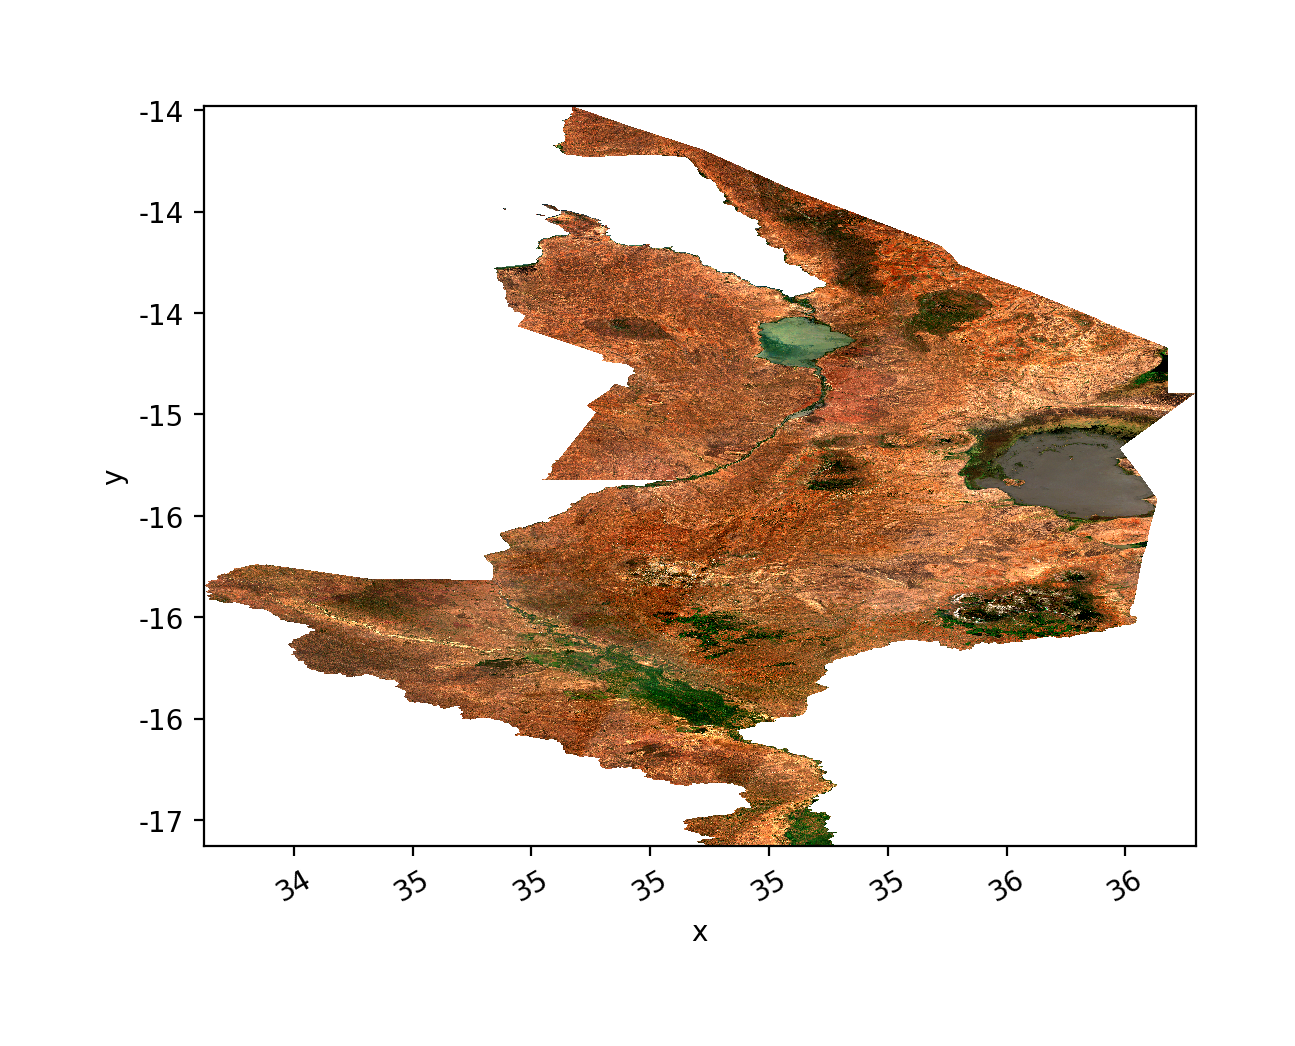

In [20]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(dpi=200)

with gw.open(tiles, mosaic=True, bounds_by='union') as src:
    src.where(src != 0).sel(band=[3, 2, 1]).gw.imshow(robust=True, ax=ax)
    print(src)

Since this took more than 20 minutes to load, we are going to save a copy locally to work with in the future!

In [30]:
src.gw.save(
        'Mosaic_Cloud_free_malawi_south_img_2022-09-01_2022-12-01.tif',
        num_workers=4  # these workers are used as Dask.compute(num_workers=num_workers)
    )

100%|██████████| 3/3 [00:00<00:00, 132.59it/s]


# NDVI Calculation and Map

Since our Mosaic image is especially large, we are going to focus on calculating NDVI for our image in the north. NDVI is an useful metric for tracking vegetation. It can also be used in land cover land use change applications to help better predict urban from rural areas. 

In [36]:
with gw.config.update(sensor='bgrn', scale_factor=0.0001):
    with gw.open('Cloud_free_malawi_north_img_2022-09-01_2022-12-01.tif') as ds:
        ndvi = ds.gw.ndvi()
        print(ndvi)


<xarray.DataArray (band: 1, y: 11157, x: 8919)>
dask.array<where, shape=(1, 11157, 8919), dtype=float64, chunksize=(1, 256, 256), chunktype=numpy.ndarray>
Coordinates:
  * x        (x) float64 33.47 33.47 33.47 33.47 ... 34.27 34.27 34.27 34.27
  * y        (y) float64 -9.579 -9.579 -9.579 -9.58 ... -10.58 -10.58 -10.58
  * band     (band) <U4 'ndvi'
Attributes: (12/18)
    transform:           (8.983152841195215e-05, 0.0, 33.47266479074796, 0.0,...
    crs:                 4326
    res:                 (8.983152841195215e-05, 8.983152841195215e-05)
    is_tiled:            1
    nodatavals:          (nan,)
    _FillValue:          nan
    ...                  ...
    AREA_OR_POINT:       Area
    _data_are_separate:  0
    _data_are_stacked:   0
    pre-scaling:         0.0001
    vi:                  ndvi
    drange:              (-1, 1)


In [45]:
import xarray as xr
with gw.open('Cloud_free_malawi_north_img_2022-09-01_2022-12-01.tif',
        band_names=['blue','green','red', 'nir']) as ndvi_img:
        ndvi_img = xr.concat([ndvi_img, ndvi], dim='band')
        display(ndvi_img)

<xarray.DataArray (band: 5, y: 11157, x: 8919)>
dask.array<concatenate, shape=(5, 11157, 8919), dtype=float64, chunksize=(4, 256, 256), chunktype=numpy.ndarray>
Coordinates:
  * x        (x) float64 33.47 33.47 33.47 33.47 ... 34.27 34.27 34.27 34.27
  * y        (y) float64 -9.579 -9.579 -9.579 -9.58 ... -10.58 -10.58 -10.58
  * band     (band) <U5 'blue' 'green' 'red' 'nir' 'ndvi'
Attributes: (12/14)
    transform:           (8.983152841195215e-05, 0.0, 33.47266479074796, 0.0,...
    crs:                 4326
    res:                 (8.983152841195215e-05, 8.983152841195215e-05)
    is_tiled:            1
    nodatavals:          (nan, nan, nan, nan)
    _FillValue:          nan
    ...                  ...
    descriptions:        ('B2', 'B3', 'B4', 'B8')
    filename:            Cloud_free_malawi_north_img_2022-09-01_2022-12-01.tif
    resampling:          nearest
    AREA_OR_POINT:       Area
    _data_are_separate:  0
    _data_are_stacked:   0

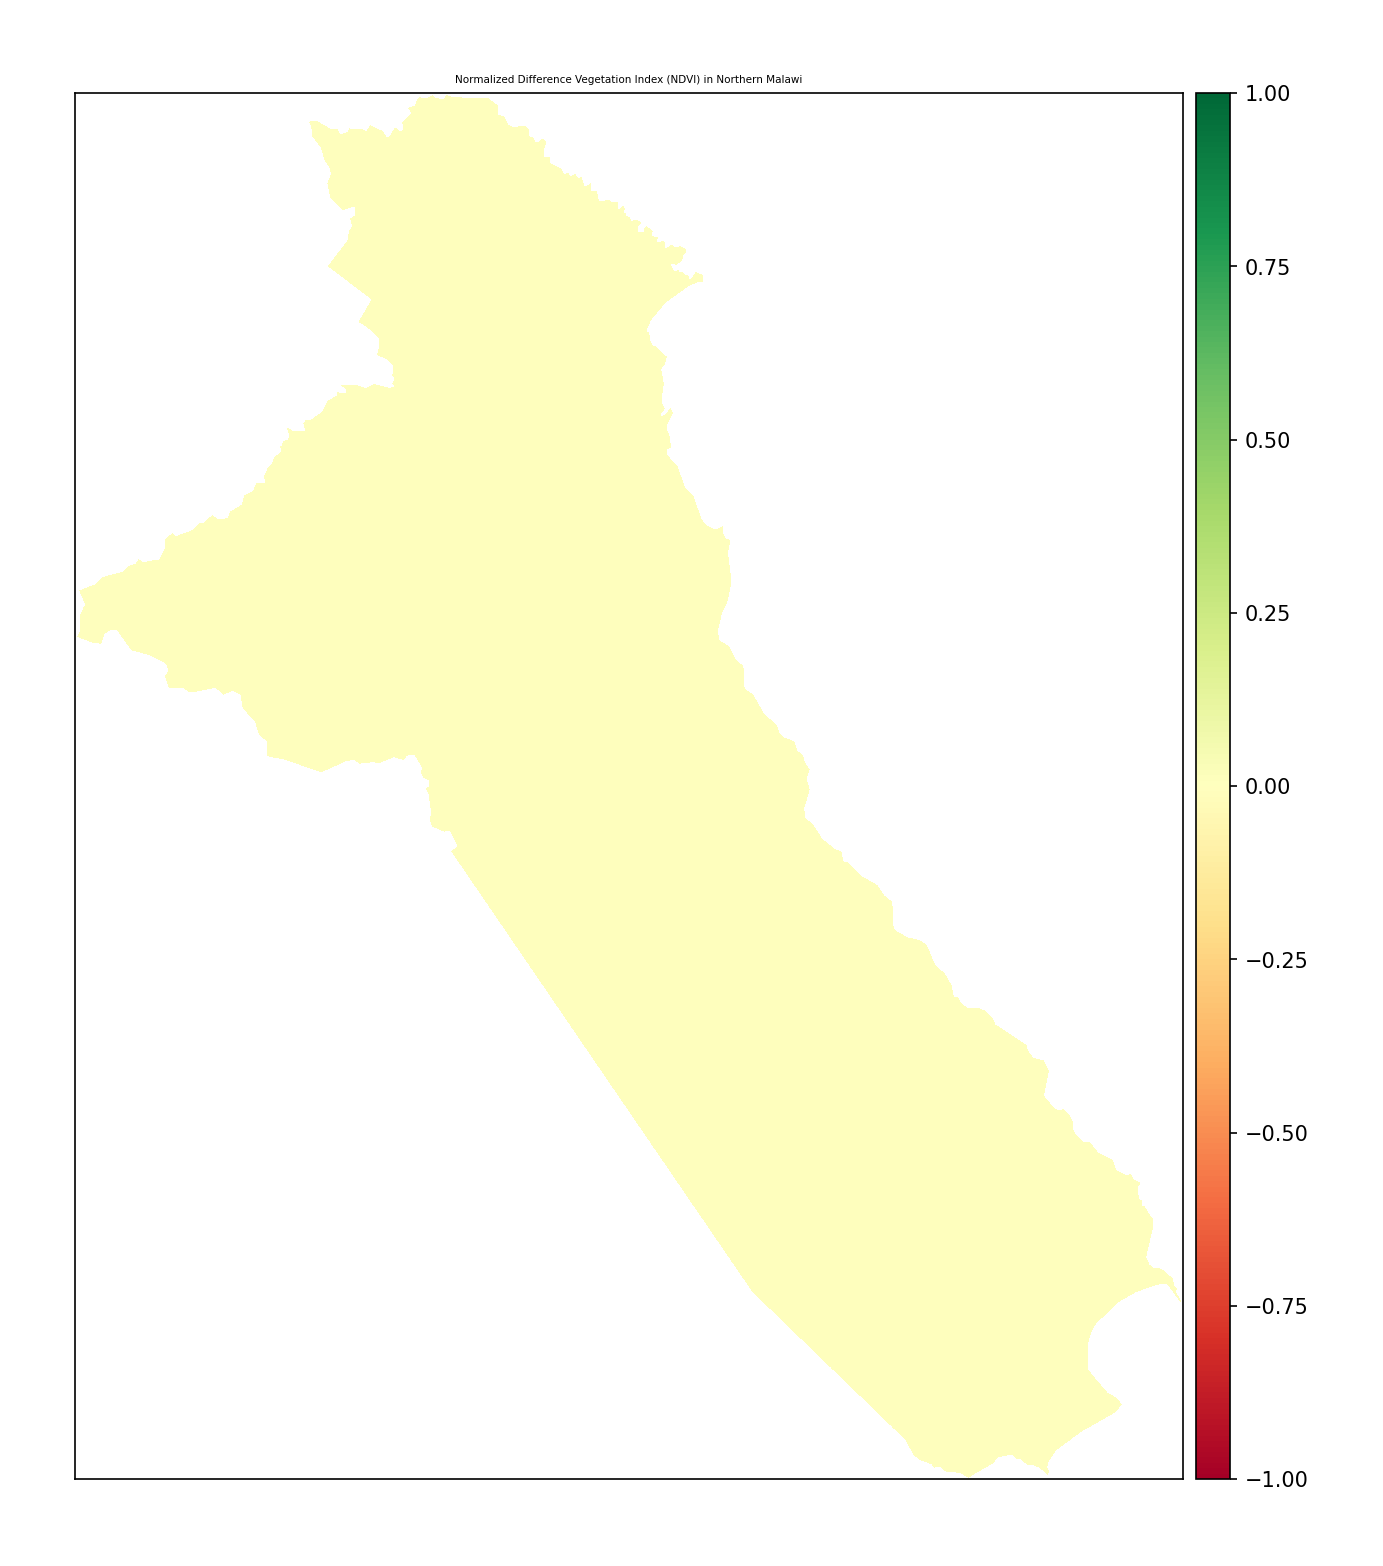

<Axes: title={'center': 'Normalized Difference Vegetation Index (NDVI) in Northern Malawi'}>

In [50]:
from matplotlib.colors import ListedColormap
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep


titles = ["Normalized Difference Vegetation Index (NDVI) in Northern Malawi"]

# Turn off bytescale scaling due to float values for NDVI
ep.plot_bands(ndvi, cmap="RdYlGn", cols=1, title=titles, vmin=-1, vmax=1)

## False Color Map
Finally, to see the gradient our near-infrared band, we create a false color image, swaping our NIR band for our regular red band. 

<xarray.DataArray (band: 4, y: 11157, x: 8919)>
dask.array<open_rasterio-7906f13570c675e2fe6619a4b4d5963c<this-array>, shape=(4, 11157, 8919), dtype=float64, chunksize=(4, 256, 256), chunktype=numpy.ndarray>
Coordinates:
  * band     (band) int64 1 2 3 4
  * x        (x) float64 33.47 33.47 33.47 33.47 ... 34.27 34.27 34.27 34.27
  * y        (y) float64 -9.579 -9.579 -9.579 -9.58 ... -10.58 -10.58 -10.58
Attributes: (12/14)
    transform:           (8.983152841195215e-05, 0.0, 33.47266479074796, 0.0,...
    crs:                 4326
    res:                 (8.983152841195215e-05, 8.983152841195215e-05)
    is_tiled:            1
    nodatavals:          (nan, nan, nan, nan)
    _FillValue:          nan
    ...                  ...
    descriptions:        ('B2', 'B3', 'B4', 'B8')
    filename:            Cloud_free_malawi_north_img_2022-09-01_2022-12-01.tif
    resampling:          nearest
    AREA_OR_POINT:       Area
    _data_are_separate:  0
    _data_are_stacked:   0


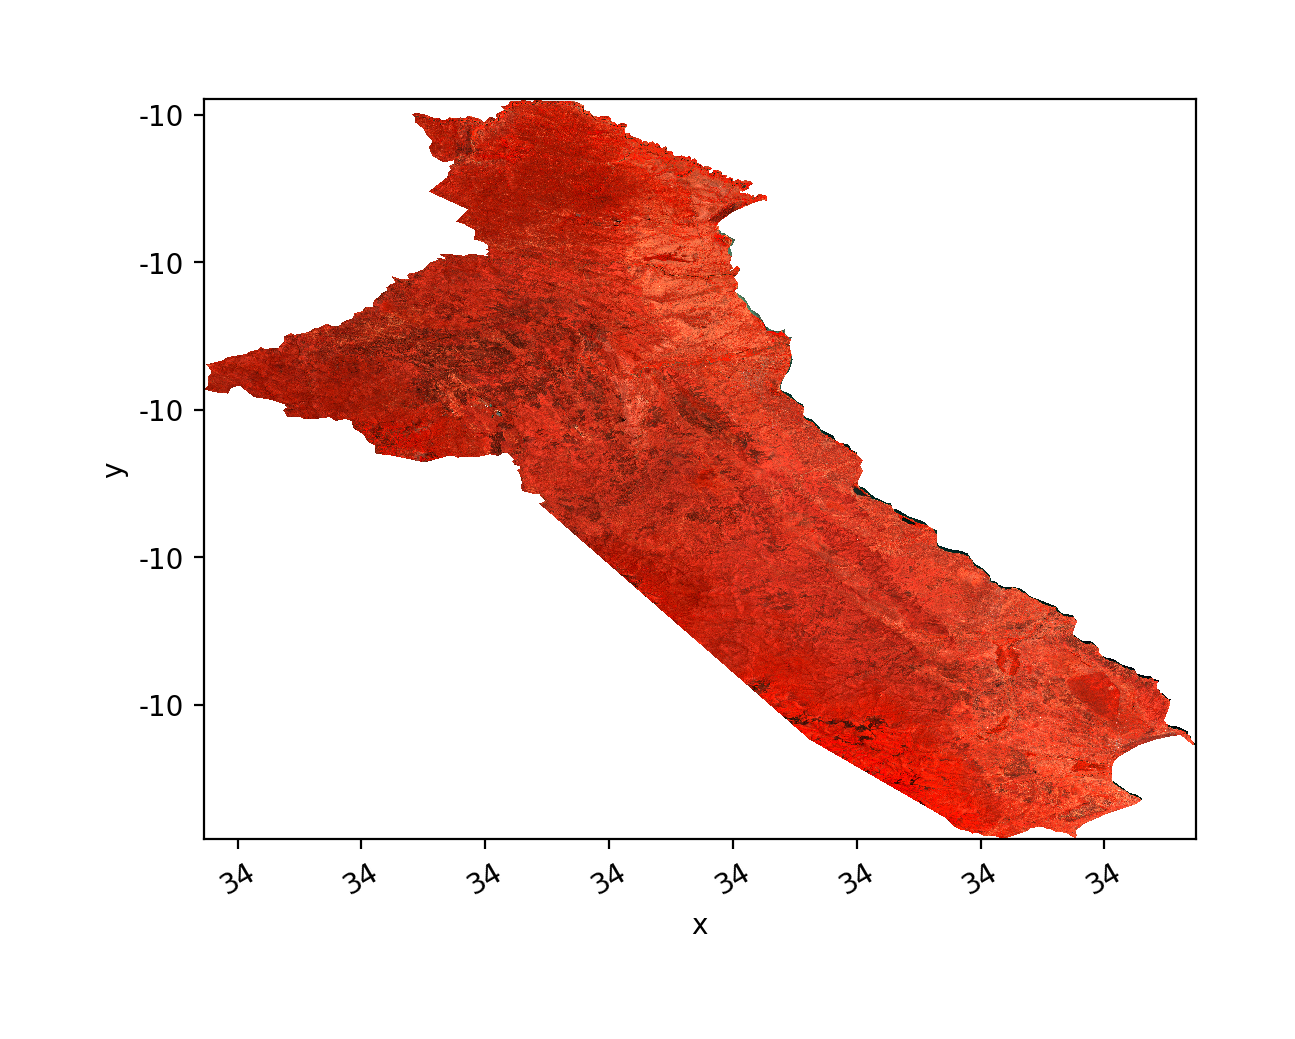

In [44]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(dpi=200)

with gw.open('Cloud_free_malawi_north_img_2022-09-01_2022-12-01.tif') as src:
    src.where(src != 0).sel(band=[4, 2, 1]).gw.imshow(robust=True, ax=ax)
    print(src)